# Tarea 2: Programación
**García Fierros Nicky**

## Instrucciones generales
Crea un programa para dibujar lo que se indica.

In [1]:
using Luxor, Colors
include("src/LuxorUtils.jl")

vector (generic function with 2 methods)

## Ejercicio 1: Dibujar Frisos
  * Un $\mathcal{F}_3$ invariante bajo el grupo $\langle T_v, Ref_{X} \rangle$.



### Solución

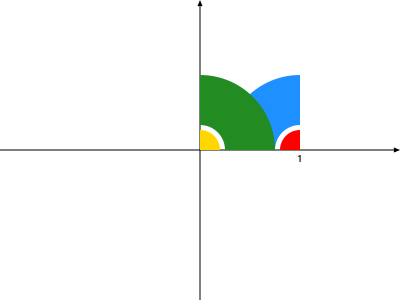

In [2]:
function miPatron()
    sethue("gold"); pie(0,0,0.2,0,π/2,:fill)
    sethue("red"); pie(1,0,0.2,π/2,π,:fill)
    sethue("dodgerblue"); sector(Point(1,0),0.25,0.75,π/2,π,:fill)
    sethue("forestgreen"); sector(0.25,0.75,0,π/2,:fill)
    
end

@draw begin 
    label("1",:S,Point(100,0))
    configurecanvas(-2,2,-1.5,1.5,height=300)
    miPatron()
end 400 300

In [3]:
function Tv(pattern, vx, vy)
    @layer begin
        translate(vx,vy)
        pattern()
    end
end

function applyTvN(pattern, vx, vy, N)
    pattern()
    [ Tv(pattern,n*vx,n*vy) for n in 1:N ]
    [ Tv(pattern,-n*vx,-n*vy) for n in 1:N ]
end

function applyReflY()
    scale(-1,1)
end

function applyReflX()
        scale(1,-1)
end

function applyRot(θ)
    rotate(θ)
end

applyRot (generic function with 1 method)

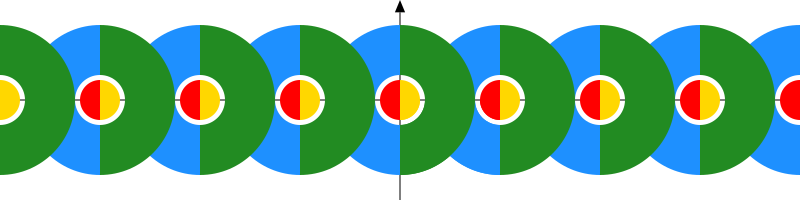

In [4]:
@draw begin 
    configurecanvas(-4,4,-1,1,width=800,height=200)
    applyTvN(miPatron, 1, 0, 5) # Generamos F₁ 
    applyReflX() # ReflX
    applyTvN(miPatron, 1, 0, 5) # Generamos F₁ después de aplicar ReflX
    miPatron()
end 800 200

* Un $\mathcal{F}_7$ invariante bajo el grupo $\langle Ref_{Y}, Rot_{\pi, v} \rangle$.

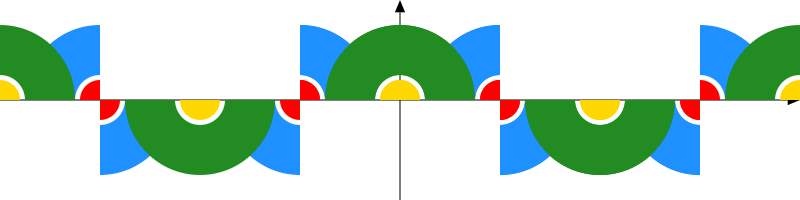

In [5]:
# F_7 = ⟨RefY, T2v ∘ RefX⟩ = ⟨RefY, Rotπ,v⟩
function patronF7(vx = 1, vy = 0)
    @layer begin
        # A ∪ ReflY(A)
        miPatron(); scale(-1,1); miPatron()
        # ∪ T2v(A) ∘ ReflX
        scale(1,-1); translate(-2vx, -2vy); miPatron()
        # ∪ A ∪ ReflY(A)
        scale(-1,1); miPatron()

    end
end

@draw begin 
    configurecanvas(-4,4,-1,1,width=800,height=200)
    vx = 1
    vy = 0

    patronF7()
    # Luego, por la observación hecha en clase,
    # F_7 es invariante en ⟨T4v⟩
    applyTvN(patronF7, 4vx, 4vy, 5) 
    
end 800 200

## Ejercicio 2: Una teselación basada en triángulos equilateros

* Invariante bajo el grupo de simetrías de mosaico p6m (el que tiene 6-centros, 3-centros y reflexiones por rectas que pasan por todos los centros).


In [6]:
function applymosaic(pattern, vx, vy, ux, uy, N)
    for m in -N:N
        @layer begin    
            translate(m*ux,m*uy) # T^m_u
            for n in -N:N
                @layer begin
                    translate(n*vx,n*vy) # T^n_v
                    pattern()
                end # layer n
            end # for n
        end # layer m
    end # for m
end

applymosaic (generic function with 1 method)

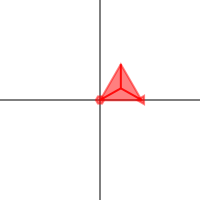

In [7]:
function patron3centro()
    @layer begin
        G = Point(0.25, 0.14)
        # lineas
        setcolor(1,0,0,0.0)
        ngonside(Point(0.25,0.14), 0.5, 3, π/2, :stroke)
        ngonside(Point(0.5, 0), 0.1, 3, π, :stroke)
        ngonside(O, 0.05, 6, 0, :stroke)
        setcolor(1,0,0,0.9)
        line(O, G, :stroke)
        line(G, Point(0.5, 0), :stroke)
        line(G, Point(0.25, 0.43), :stroke)

        # fill
        setcolor(1,0,0,0.5)
        ngonside(Point(0.25,0.14), 0.5, 3, π/2, :fillstroke)
        ngonside(Point(0.5, 0), 0.1, 3, π, :fillstroke)
        ngonside(O, 0.05, 6, 0, :fillstroke)
        
    end
end

@draw begin
    configurecanvas(-3,3,-3,3,width=500,height=500)
    patron3centro()
end 200 200

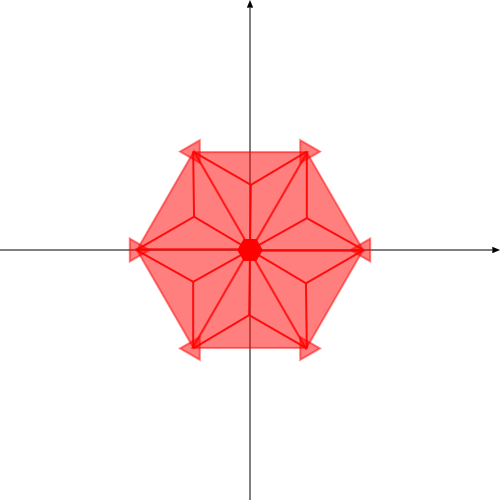

In [8]:
function patron6centro()
    @layer begin
        for n in 1:6
            patron3centro()
            rotate(2π/6)
        end
    end
    
end

@draw begin
    configurecanvas(-1.1,1.1,-1.1,1.1,width=500,height=500)        
    patron6centro()
end 500 500

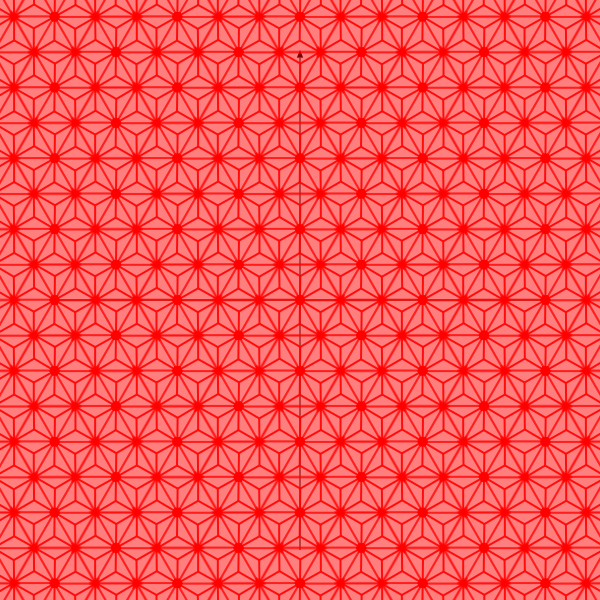

In [353]:
@draw begin
    α = 0.85
    configurecanvas(-3,3,-3,3,width=500,height=500)        
    applymosaic(patron6centro,α*cos(π/6), α*sin(π/6), α*cos(π/6), -α*sin(π/6),8)
end

* Adornando los triángulos, invariante bajo el grupo de simetrías de mosaico p31m (el que tiene sólo 3-centros y reflexiones por rectas que pasan ciertos centros).

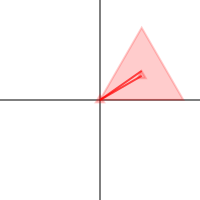

In [10]:
function patron()
    G = Point(0.5, 0.29)
    H = Point(0.5, 0.35)
    #lineas
    setcolor(1,0,0,0.2)
    #ngonside(O, 0.10, 3, π/2, :fillstroke)
    ngonside(O, 0.10, 3, π/2, :stroke)
    ngonside(G, 0.10, 3, π/2, :stroke)
    #translate(O)
    ngonside(G, 1, 3, π/2, :stroke)
    #ngonside(G, 1, 3, π/2, :fillstroke)
    #ngonside(Point(1, 0), 0.05, 6, π/2, :fillstroke)
    setcolor(1,0,0,0.7)
    line(O, G, :stroke)
    line(O, H, :stroke)
    # relleno
    setcolor(1,0,0,0.2)
    ngonside(O, 0.10, 3, π/2, :fill)
    ngonside(G, 0.10, 3, π/2, :fill)
    ngonside(G, 1, 3, π/2, :fill)
end

@draw begin
    configurecanvas(-3,3,-3,3,width=500,height=500)
    patron()
end 200 200

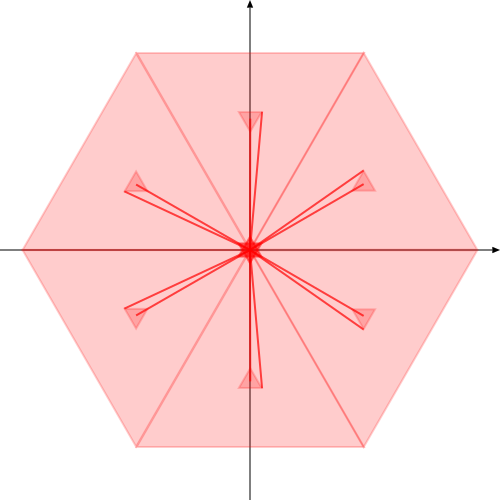

In [11]:
function patron31m()
    G = Point(0.5, 0.29)
    for n in 1:3
        @layer begin
            patron()
            scale(1, -1) # RefX
            #translate(0.75, 0.43)
            patron()
        end
        rotate(2π/3)
    end
end

@draw begin
    configurecanvas(-1.1,1.1,-1.1,1.1,width=500,height=500)        
    patron31m()
end 500 500

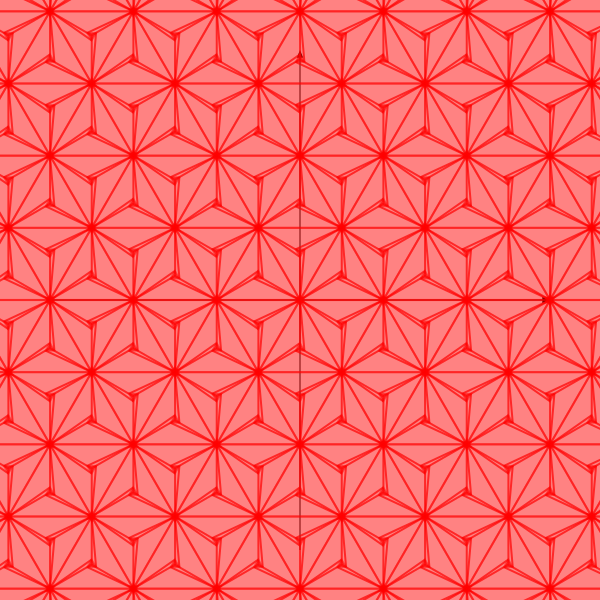

In [12]:
@draw begin
    configurecanvas(-3,3,-3,3,width=500,height=500)        
    applymosaic(patron31m,1+cos(2pi/3),sin(2pi/3),1+cos(2pi/3),-sin(2pi/3),8)
end

## Ejercicio 3: Las teselaciones casi regulares en las imágenes

### Teselación 1

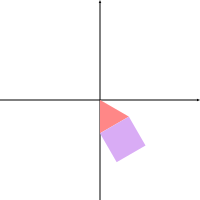

In [385]:
function patron()
    G = Point(0, 0.29)
    H = Point(0.5, 0.35)
    F = Point(1, -1.73)
    #lineas
    translate(0, -0.5*1.73)
    #ngonside(G, 1, 3, π/2, :stroke)
    setcolor(255/255, 135/255, 135/255)
    ngonside(G, 1, 3, π/2, :fill)
    translate(-0.5,-1)
    setcolor(217/255, 172/255, 245/255)
    #scale(-1, 1) # RefX
    rect(O, 1, 1, :fill)

end

@draw begin
    configurecanvas(-3,3,-3,3,width=200,height=200)
    rotate(π/6)
    patron()

end 200 200

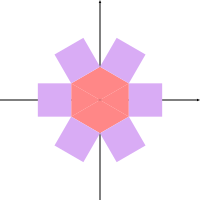

In [386]:
function hexagono()
    G = Point(0.5, 0.29)
    for n in 1:6
        @layer begin
            rotate(π/6)
            patron()
        end
        rotate(2π/6)
    end
end

@draw begin
    configurecanvas(-3,3,-3,3,width=200,height=200)
    hexagono()
end 200 200

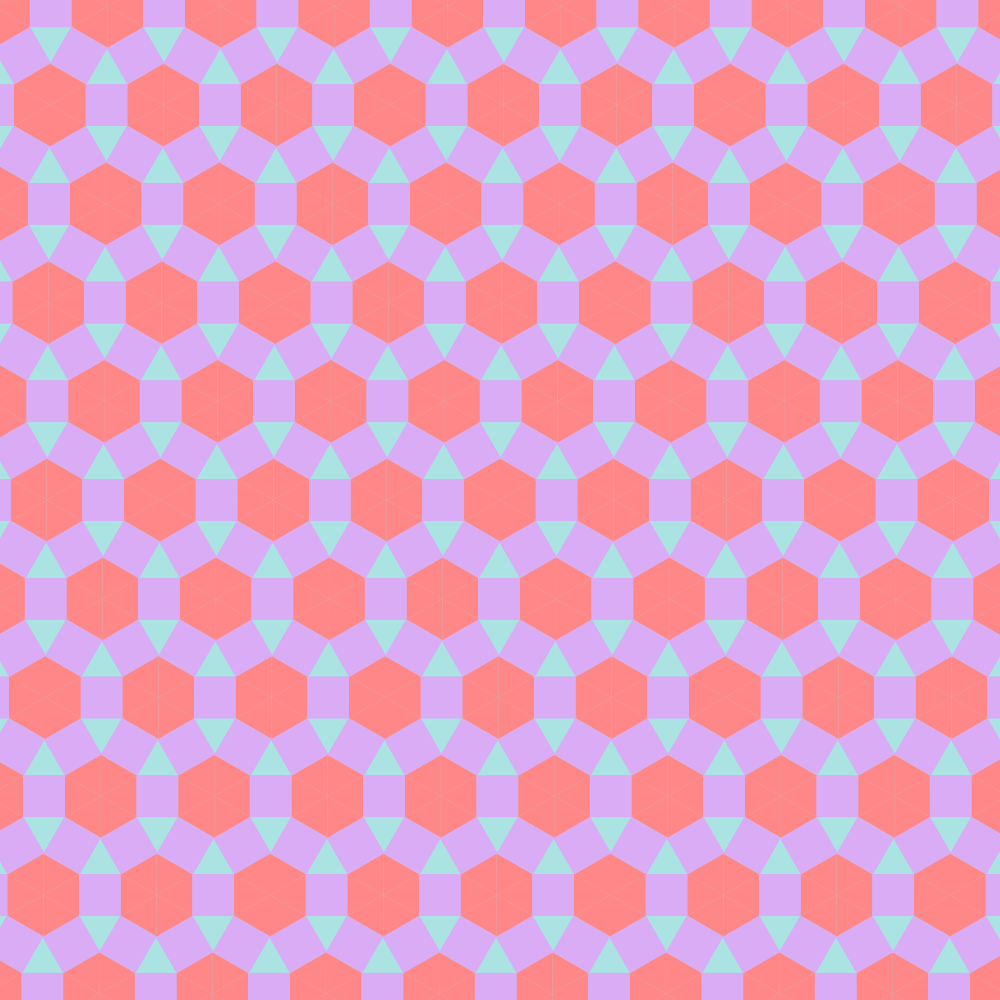

In [15]:
function applymosaic(pattern, vx, vy, ux, uy, N)
    for m in -N:N
        @layer begin    
            translate(m*ux,m*uy) # T^m_u
            for n in -N:N
                @layer begin
                    translate(n*vx,n*vy) # T^n_v
                    pattern()
                end # layer n
            end # for n
        end # layer m
    end # for m
end

@draw begin
    background(170/255, 227/255, 226/255)
    setcolor(170/255, 227/255, 226/255)
    configurecanvas(-6,6,-6,6,width=500,height=500)        
    applymosaic(hexagono,2.72, 0, 1.38, 2.37,8)
end 1000 1000

### Teselación 2

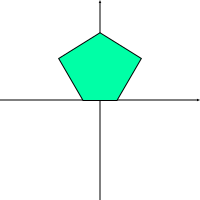

In [387]:
function patron(color=nothing)
    vert = [
        Point(-0.25, 0), Point(0.25, 0),
        Point(0.61, 0.62), Point(0,1),
        Point(-0.61, 0.62)
    ]
    setcolor(0, 0, 0)
    poly(vert, :stroke, close=true)
    
    if color == nothing
        setcolor(1, 0, 0, 0.5)
    else
        setcolor(color)
    end

    poly(vert, :fill, close=true)
end

@draw begin
    configurecanvas(-1.5,1.5,-1.5,1.5,width=200,height=200)
    #rotate(π/6)
    patron((0, 1, 0.65, 1))

end 200 200

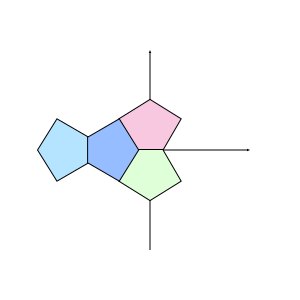

In [393]:
function experimento()
    colores = [
        (247/255, 200/255, 224/255, 1),
        (223/255, 255/255, 216/255, 1),
        (180/255, 228/255, 255/255, 1),
        (149/255, 189/255, 255/255, 1)
    ]
    for n in 0:3
        @layer begin
            patron(colores[mod(n, 4) == 0 ? 1 : n])
            setcolor(colores[mod(n+1, 4) == 0 ? 1 : n+1])
            scale(1, -1)
            patron(colores[mod(n+1, 4) == 0 ? 1 : n+1])
        end
        rotate(π/2)
        translate(0, 1.238)

    end
end

function patronTeselacion()
    colores = [
        (247/255, 200/255, 224/255, 1),
        (223/255, 255/255, 216/255, 1),
        (180/255, 228/255, 255/255, 1),
        (149/255, 189/255, 255/255, 1)
    ]
    for n in 1:1
        @layer begin
            patron(colores[1])
            scale(1, -1)
            patron(colores[2])
        end
        rotate(π/2)
        translate(0, 1.238)
        @layer begin
            patron(colores[3])
            scale(1, -1)
            patron(colores[4])
        end
    end
end
@draw begin
    configurecanvas(-2,2,-2,2,width=200,height=200)
    patronTeselacion()
    #rotate(π/2)
    #translate(0, 1.238)
    #patronTeselacion()
end 300 300

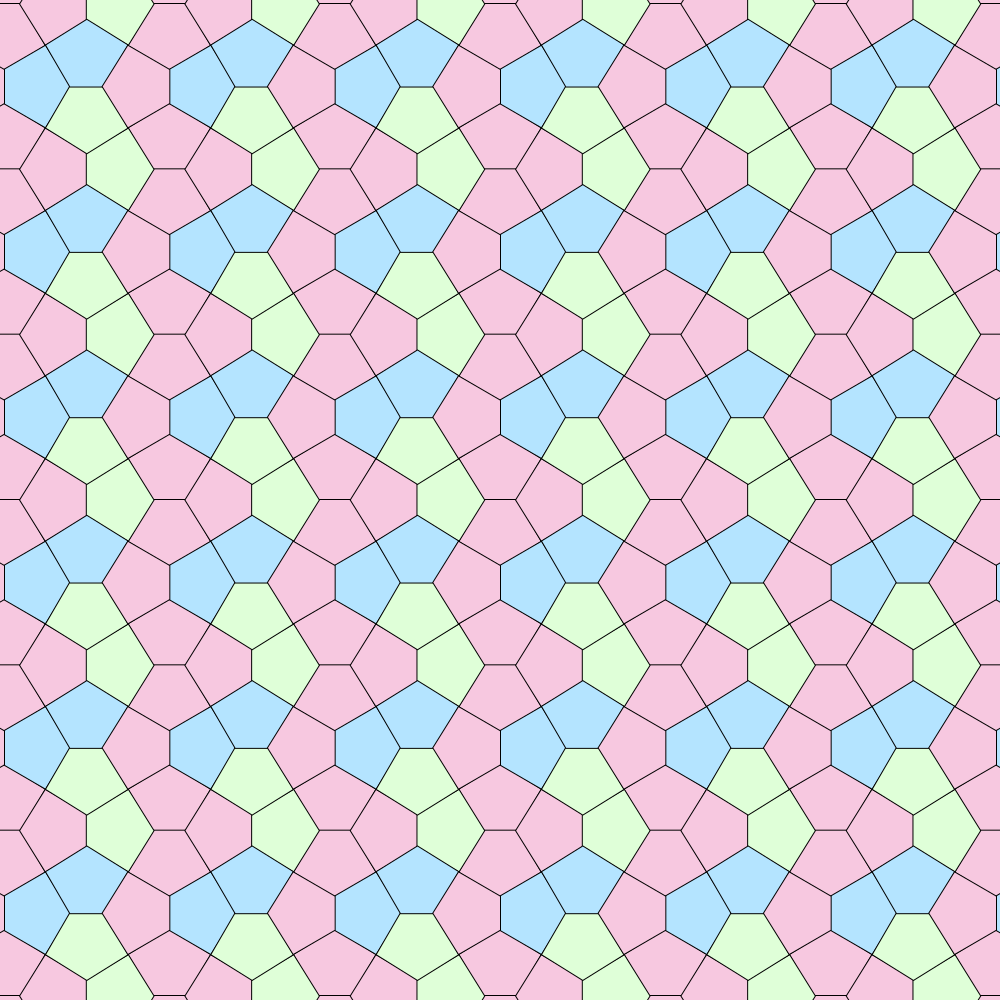

In [349]:
@draw begin
    #background(170/255, 227/255, 226/255)
    #setcolor(170/255, 227/255, 226/255)
    configurecanvas(-6,6,-6,6,width=800,height=800)
    ux = 2.48
    uy = 0
    vx = 0
    vy = 2.48
    applymosaic(experimento,ux, uy, vx, vy,8)
end 1000 1000

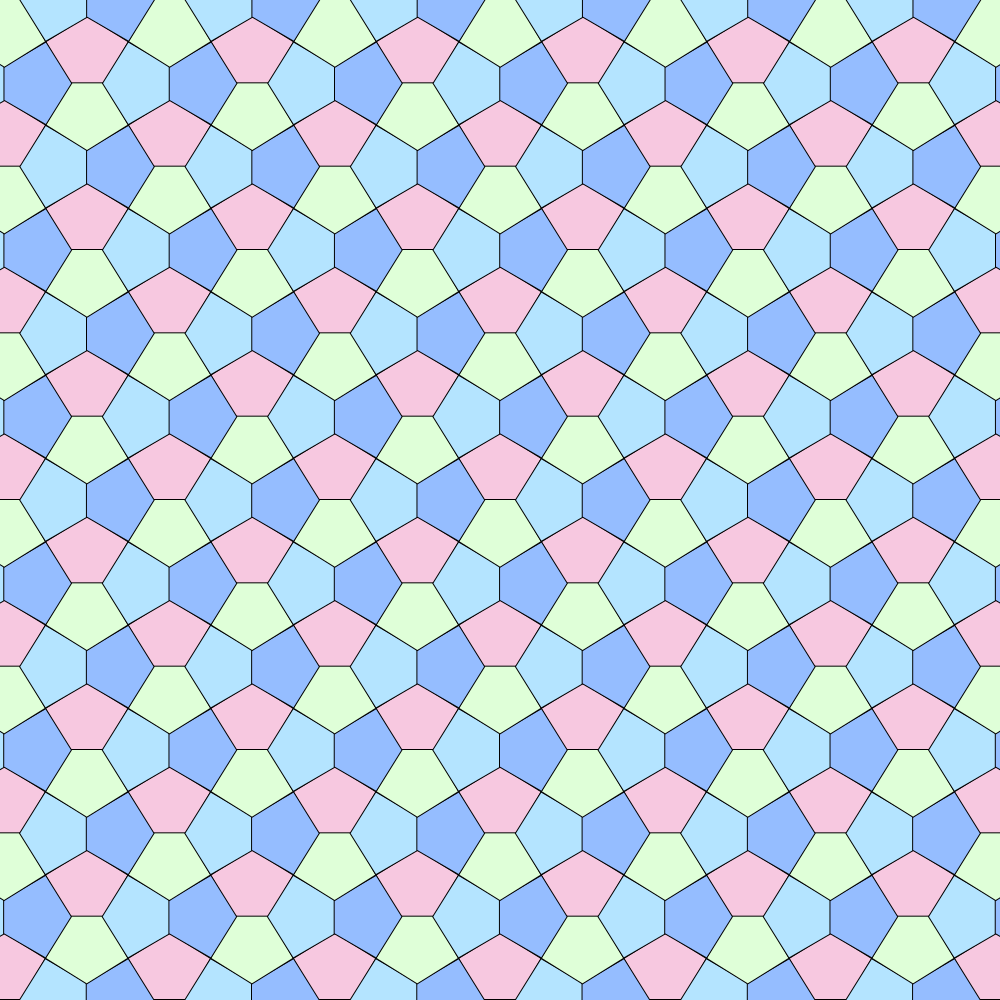

In [351]:
@draw begin
    #background(170/255, 227/255, 226/255)
    #setcolor(170/255, 227/255, 226/255)
    configurecanvas(-6,6,-6,6,width=800,height=800)
    ux = 2.479
    uy = 0
    vx = 1.24
    vy = 1.25
    applymosaic(patronTeselacion,ux, uy, vx, vy,8)
end 1000 1000

## Ejercicio 4: La indicación de la región fundamental correspondiente al grupo de simetrías de la teselación pitagórica de cuadrados



In [382]:
function pitaquads(a, b)
    @layer begin
        setdash("dash")
        sethue("orangered"); setopacity(0.5)
        poly([O,Point(a,0),Point(a,a),Point(0,a)],:fillstroke,close=true)
        sethue("darkgreen"); setopacity(0.5)
        poly([Point(a,0),Point(a+b,0),Point(a+b,b),Point(a,b)],:fillstroke,close=true)
    end
end

pitaquads (generic function with 1 method)

### Afirmación: El siguiente conjunto es una región fundamental de $G = \langle T_u, T_v \rangle$

$$
\mathfrak{R} = \{(x,y)\ \vert\ 0<x<|a|, 0 < y < |a|\} \cup \{(x,y)\ \vert\ |a|<x<|a+b|, 0 < y < |b|\}
$$

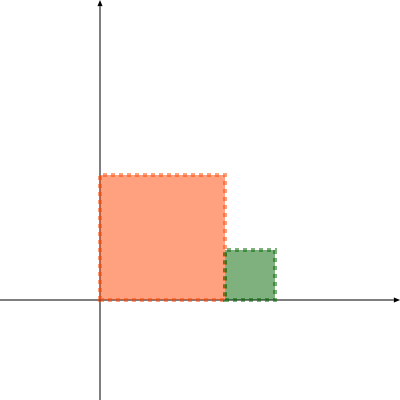

In [383]:
a, b = 5, 2
@draw begin
    configurecanvas(-4,12,-4,12)
    setline(4)
    pitaquads(a,b)
end 400 400

En efecto, claramente $\mathfrak{R} \subsetneq E(2)$, y al ser unión de abiertos en $(X, \tau_d)$ con $\tau_d$ la topología inducida por la métrica euclidiana, se tiene que $\mathfrak{R} \in \tau_d$. Obsérvese que más aún, $\mathfrak{R}$ es unión de dos básicos de $\tau_d$, por lo que $\mathfrak{R}$ es un básico de $\tau_d$.

Sean $(p,q),(r,s) \in \mathfrak{R}$ distintos entre si. Nótese que si existe $g \in G$ tal que $(r,s) = g(p,q)$ entonces podrían ocurrir dos casos:
* Si $(r,s) = (p + na, q + nb)$ para algún $n$
    * Si $n \in \mathbb{N}$ entonces, en tanto que necesariamente $p \in \mathbb{Z}^{+}$ se tiene que $r + p + na \implies r > |a|$. Luego, $b<a$ y $p \in (0, |a|) \implies r = p + na > | a + b|$. Por lo tanto $(r,s) \not\in \mathfrak{R}$.
    * Si en cambio $n \in \mathbb{Z}$ entonces $0 < p < |a|$ implica que existe $k$ tal que $pk = |a|$, de donde se tiene que, si $a > 0$, $pk = a$, de modo que $r = p + npk = p(1 + nk)$ y $1+nk < 0$, por lo que $r < 0$ y así se tiene que $(r,s) \not\in\mathfrak{R}$. Si en cambio $a < 0$, entonces $nk > 0$ y $r > |a|$ y además, por el caso anterior $r > |a + b|$, de modo que también $(r, s) \not\in\mathfrak{R}$
* Si $(r,s) = (p - nb, q + na)$ para algún $n$, entonces procediendo de forma análoga al caso anterior se tiene que $(r,s) \not\in \mathfrak{R}$.

Como en cualquier caso $(r,s) \not\in\mathfrak{R}$, pero tomamos $(r,s) \in \mathfrak{R}$, entonces debe ser que no existe $g \in G$ tal que $(r,s) = g(p,q)$.

Sea $p = (x, y) \in E(2)$. Si $p \in \mathfrak{R}$ entonces como $G$ es grupo debe ser que $1_{G} \in G$, y de esta forma existe $q = (x,y) \in \mathbb{R}$ tal que $q = 1_{G}p$, es decir, $q$ es $G-$ equivalente a $p$. 
Supongamos entonces que $p \not\in \mathfrak{R}$. Entonces $x > |a+b|$ y $y > |a|$ o $x < 0$ y $y < 0$.

* Si $x > |a+b|$ y $y > |a|$ entonces existen $n, m$ tales que $x = n|a+b|$ y $y = m|a|$. Sean $N, M \in \mathbb{Z}$ tales que $N|a+b| > n|a+b|$ y $M|a| > m|a|$.
Consideremos $k = \min\{N,M\}$. Entonces claramente $(x,y) \in T_{kv}(\mathfrak{R})$ o $(x,y) \in T_{ku}(\mathfrak{R})$. Luego, como ambas transformaciones son biyectivas, existe $s \in \mathfrak{R}$ tal que $(x,y)$ es imagen de $s$.
* Si $x < 0$ y $y < 0$ entonces bajo un razonamiento análogo al caso anterior existe $s \in \mathfrak{R}$ tal que $(x,y)$ es imagen de $s$ bajo alguna $g \in G$.

Finalmente, es claro que la frontera de $\mathfrak{R}$ tiene medida cero, pues $\mathfrak{R}$ es un básico de $\tau_d$.

De esta forma, se tiene que $\mathfrak{R}$ es una región fundamental de $G$.

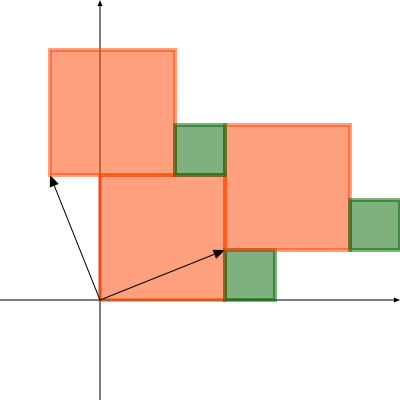

In [358]:
a, b = 5, 2
@draw begin
    configurecanvas(-4,12,-4,12)
    setline(4); pitaquads(a,b)
    v = Point(a,b)
    @layer begin arrow(O, v,arrowheadlength=0.5); translate(v); pitaquads(a,b) end
    u = Point(-b,a)
    @layer begin arrow(O, u,arrowheadlength=0.5); translate(u); pitaquads(a,b) end
end 400 400

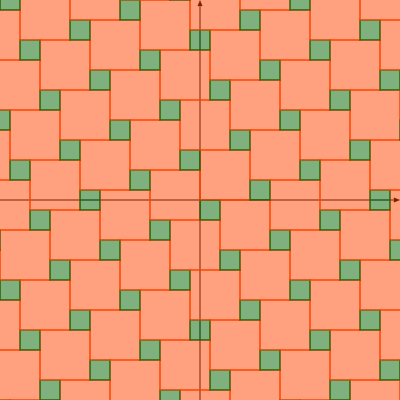

In [356]:
a, b = 5, 2
mypitaquads() = pitaquads(a,b) # Function sin parámetros para usarla en applymosaic...
@draw begin
    configurecanvas(-20,20,-20,20)
    applymosaic(mypitaquads,a,b,-b,a,8) # v=(a+b,0), u=(a,b)
end 400 400

## Ejercicio 5: Dos teselaciones regulares en el plano invariantes bajo 2 grupos distintos, a partir de imágenes.

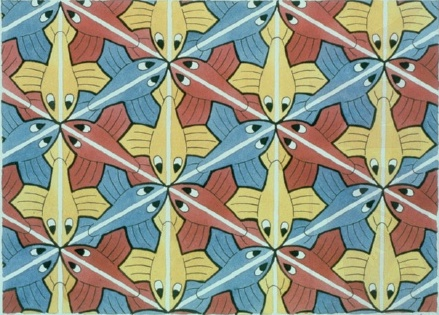

In [406]:
e123 = readpng("img/e123png.png")
@draw begin
    placeimage(e123, O, centered=true) 
end e123.width e123.height

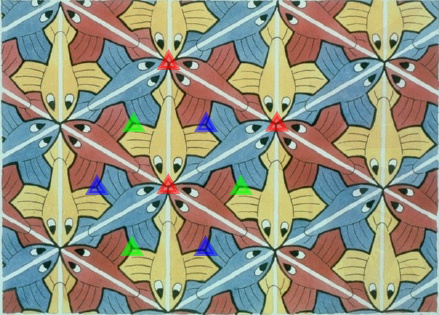

In [727]:
# Es un p3

p1 = Point(168.31, 187.14)
p2 = Point(168.6, 62.97)
p3 = Point(241, 188)
p4 = Point(205.58, 249)#248.12)#250.95)
p5 = Point(97, 188)#Point(97.21, 187.87)#187.54)
p6 = Point(206.03, 125.14)
p7 = Point(276.99, 124.65)
p8 = Point(133.55, 125.14)#Point(133.55, 123.04)
p9 = Point(132, 249)#Point(133.53, 248.12)


@draw begin
    translate(-e123.width/2, -e123.height/2) # "Destrasladar" del centro del dibujo
    placeimage(e123, O) # 
    setline(4)
    setcolor(RGBA(1,0,0,0.5)); ngon(p1, 10, 3, π/6, :fillstroke);
    setcolor(RGBA(1,0,0,0.5)); ngon(p2, 10, 3, π/6, :fillstroke);
    setcolor(RGBA(1,0,0,0.5)); ngon(p7, 10, 3, π/6, :fillstroke);
    setcolor(RGBA(0,1,0,0.5)); ngon(p3, 10, 3, π/6, :fillstroke);
    setcolor(RGBA(0,1,0,0.5)); ngon(p8, 10, 3, π/6, :fillstroke);
    setcolor(RGBA(0,1,0,0.5)); ngon(p9, 10, 3, π/6, :fillstroke);
    setcolor(RGBA(0,0,1,0.5)); ngon(p6, 10, 3, π/6, :fillstroke);
    setcolor(RGBA(0,0,1,0.5)); ngon(p5, 10, 3, π/6, :fillstroke);
    setcolor(RGBA(0,0,1,0.5)); ngon(p4, 10, 3, π/6, :fillstroke);
    
end e123.width e123.height

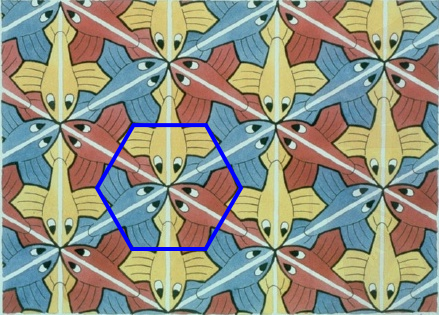

In [731]:
@draw begin
    translate(-e123.width/2, -e123.height/2) # "Destrasladar" del centro del dibujo
    placeimage(e123, O)
    sethue("blue"); setline(4)
    poly([p3, p6, p8, p5, p9, p4], :stroke, close=true)
end e123.width e123.height

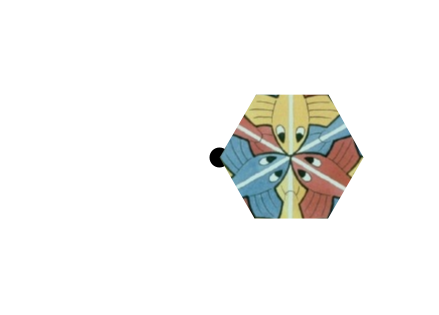

In [732]:
@draw begin
    circle(O, 10, :fill) # Centro del área de dibujo
    translate(-p5) # Para que el cuadrado tenga un vértice en (0,0)
    poly([p3, p6, p8, p5, p9, p4], :clip, close=true)
    placeimage(e123, O)
end e123.width e123.height

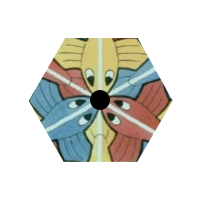

In [733]:
function patrone123()
    @layer begin
        translate(-p1) # Para que el cuadrado tenga un vértice en (0,0)
        poly([p3, p6, p8, p5, p9, p4], :clip, close=true)
        placeimage(e123, O)
    end
end
@draw begin
    #generarE123()
    patrone123()
    circle(O, 10, :fill)
end 200 200

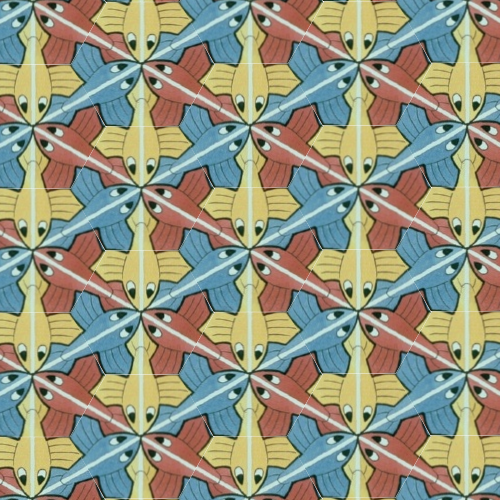

In [730]:
v, u = p2-p1, p7-p1
@draw begin
    #scale(0.25,0.25)
    scale(1,1)
    applymosaic(patrone123,v.x,v.y,u.x,u.y,8)
end 500 500

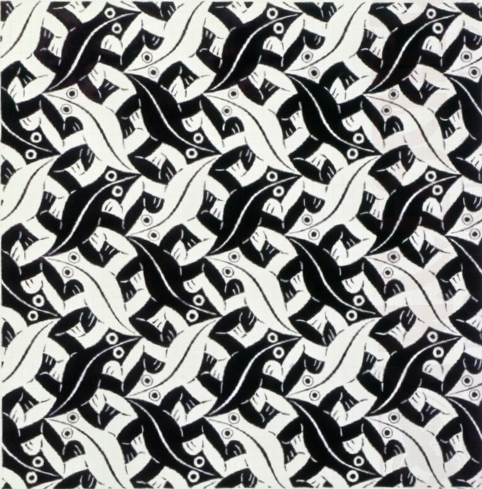

In [407]:
e124 = readpng("img/e124png.png")
@draw begin
    placeimage(e124, O, centered=true) 
end e124.width e124.height

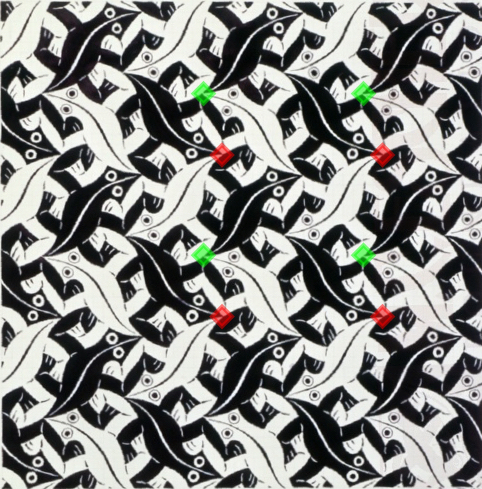

In [757]:
# Es un p1

p1 = Point(222, 155)
p2 = Point(382.5, 155)
p3 = Point(382.5, 316.6)
p4 = Point(222, 316.6)

p5 = Point(203.5, 93.6)
p6 = Point(363.5, 93.6)
p7 = Point(363.5, 255.2)
p8 = Point(203.5, 255.2)


@draw begin
    translate(-e124.width/2, -e124.height/2) # "Destrasladar" del centro del dibujo
    placeimage(e124, O) # 
    setline(4)
    setcolor(RGBA(1,0,0,0.5)); ngon(p1, 10, 4, 0, :fillstroke);
    setcolor(RGBA(1,0,0,0.5)); ngon(p2, 10, 4, 0, :fillstroke);
    setcolor(RGBA(1,0,0,0.5)); ngon(p3, 10, 4, 0, :fillstroke);
    setcolor(RGBA(1,0,0,0.5)); ngon(p4, 10, 4, 0, :fillstroke);

    setcolor(RGBA(0,1,0,0.5)); ngon(p5, 10, 4, 0, :fillstroke);
    setcolor(RGBA(0,1,0,0.5)); ngon(p6, 10, 4, 0, :fillstroke);
    setcolor(RGBA(0,1,0,0.5)); ngon(p7, 10, 4, 0, :fillstroke);
    setcolor(RGBA(0,1,0,0.5)); ngon(p8, 10, 4, 0, :fillstroke);

    
end e124.width e124.height

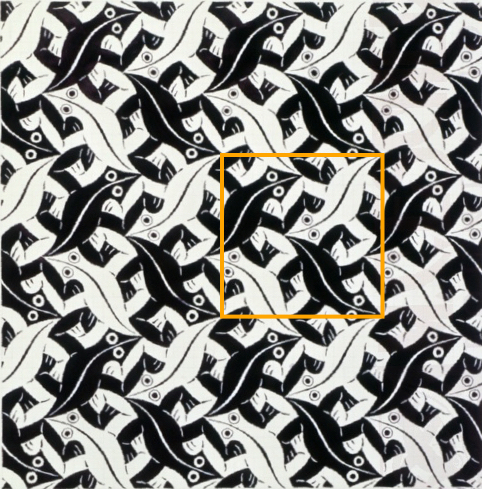

In [750]:
@draw begin
    translate(-e124.width/2, -e124.height/2) # "Destrasladar" del centro del dibujo
    placeimage(e124, O)
    sethue("orange"); setline(4)
    poly([p1, p2, p3, p4], :stroke, close=true)
end e124.width e124.height

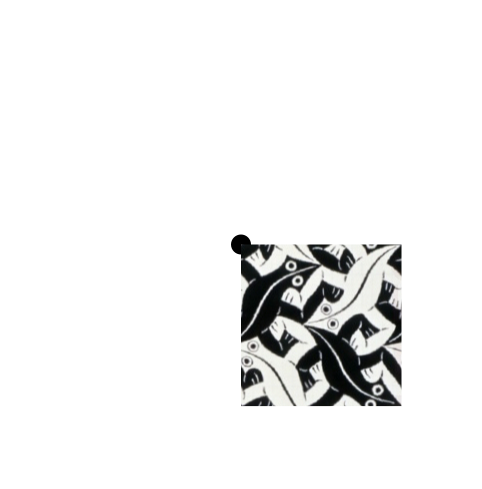

In [751]:
@draw begin
    circle(O, 10, :fill) # Centro del área de dibujo
    translate(-p1) # Para que el cuadrado tenga un vértice en (0,0)
    poly([p1, p2, p3, p4], :clip, close=true)
    placeimage(e124, O)
end e124.width e124.height

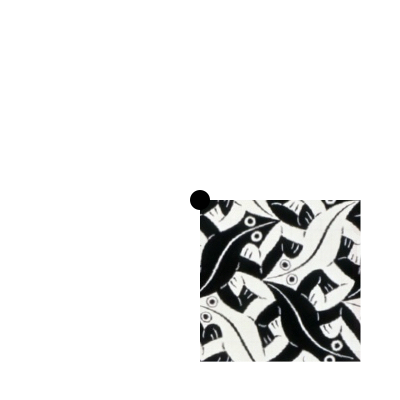

In [754]:
function patrone124()
    @layer begin
        translate(-p1) # Para que el cuadrado tenga un vértice en (0,0)
        poly([p1, p2, p3, p4], :clip, close=true)
        placeimage(e124, O)
    end
end
@draw begin
    patrone124()
    circle(O, 10, :fill)
end 400 400

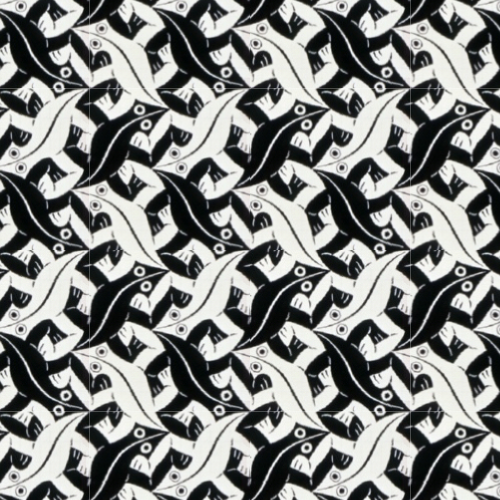

In [755]:
v, u = p2-p1, p3-p1
@draw begin
    scale(1,1)
    applymosaic(patrone124,v.x,v.y,u.x,u.y,8)
end 500 500

# Fin